# Simple Reccomendation System

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = False

In [2]:
movies = pd.read_csv('u.data', sep= '\t', names= ['User', 'Movie', 'Rating', 'Time'])
movies

,User,Movie,Rating,Time
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   User    100003 non-null  int64
 1   Movie   100003 non-null  int64
 2   Rating  100003 non-null  int64
 3   Time    100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [9]:
movies.isna().any()

User      False
Movie     False
Rating    False
Time      False
dtype: bool

In [10]:
movies.head()

,User,Movie,Rating,Time
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


## Users

In [12]:
movies.User.nunique()

944

In [13]:
movies.User.value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
475     20
596     20
147     20
19      20
0        3
Name: User, Length: 944, dtype: int64

## Movies

In [18]:
movies.Movie.nunique()

1682

In [19]:
movies.Movie.value_counts()

50      584
258     509
100     508
181     507
294     485
       ... 
1648      1
1571      1
1329      1
1457      1
1663      1
Name: Movie, Length: 1682, dtype: int64

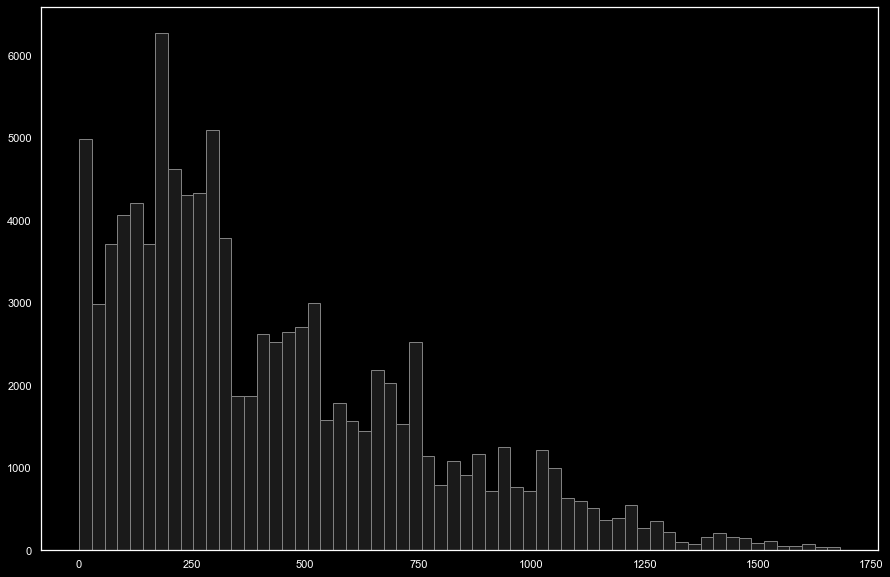

In [35]:
plt.hist(x= movies.Movie, bins= 60, color= 'k', edgecolor= 'grey');

## 

### Another dataset with `Movie Titles`

In [4]:
titles = pd.read_csv('Movie_Id_Titles')
titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


### Mergning dfs.

In [44]:
titles.item_id.nunique()

1682

In [45]:
movies.Movie.nunique()

1682

--

# # Ask Grras

I have two datasets, and one has id and another one has names associated with ids, now I want to check if both of data share same Id or not, how to check that... no extra id and no less id... just same... how to check them?

My answer (still not asked - The ✓ will only after asking to the FUCK): We can use **Index1 & Index2**
It works like set operations, gives only which match in both.

In [5]:
MOVIES = pd.merge(movies, titles, left_on= 'Movie', right_on= 'item_id' ).drop(['Movie'], axis= 1)
MOVIES

,User,Rating,Time,item_id,title
0,0,5,881250949,50,Star Wars (1977)
1,290,5,880473582,50,Star Wars (1977)
2,79,4,891271545,50,Star Wars (1977)
3,2,5,888552084,50,Star Wars (1977)
4,8,5,879362124,50,Star Wars (1977)
...,...,...,...,...,...
99998,840,4,891211682,1674,Mamma Roma (1962)
99999,655,3,888474646,1640,"Eighth Day, The (1996)"
100000,655,3,888984255,1637,Girls Town (1996)
100001,655,3,887428735,1630,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [68]:
MOVIES.isna().any()

User       False
Rating     False
Time       False
item_id    False
title      False
dtype: bool

In [6]:
MOVIES[MOVIES.title.str.lower().str.startswith('shawshank')]['Rating'].mean()

4.445229681978798

### Haha, cool ↑

# 

### Let's see the best rated movies, which has `mean >= 4`

In [122]:
MOVIES.groupby('title')['Rating'].mean().sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: Rating, Length: 1664, dtype: float64

Here, it is possible that, only a couple of people have given the rating of `5.0` and is assigned as 5 and is on the top!

Let's now do that, but with another filter - `Rating > 4` **but** `sorted by people's count`

In [8]:
rate = MOVIES.groupby('title')['Rating'].mean()
usr = MOVIES.groupby('title')['User'].count()

In [9]:
get_ratings = pd.DataFrame({'Users_count': usr, 'Users_rated': rate})
get_ratings

,Users_count,Users_rated
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


# Here is how it is done!!

In [132]:
get_ratings[ get_ratings['Users_rated'] > 4 ].sort_values(by= 'Users_count', ascending= False)

,Users_count,Users_rated
title,,
Star Wars (1977),584,4.359589
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Raiders of the Lost Ark (1981),420,4.252381
"Godfather, The (1972)",413,4.283293
...,...,...
Aiqing wansui (1994),1,5.000000
Someone Else's America (1995),1,5.000000
Entertaining Angels: The Dorothy Day Story (1996),1,5.000000


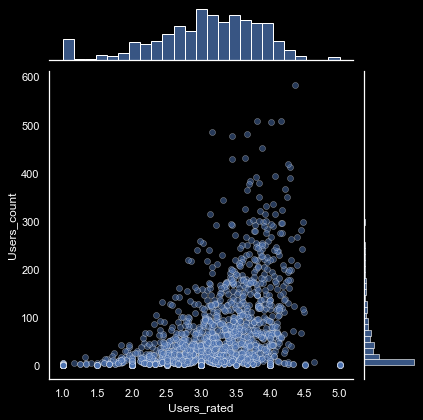

In [10]:
sns.jointplot(x= 'Users_rated', y= 'Users_count', data= get_ratings, color= 'b', alpha= 0.5)

# 

# 

# Now, making a System

**Refresher**  

> What is a pivot table?
    
    It creates a Matrix in which we give rows and columns as our handles and give the values on which it will do some math (generally mean) and return back to us.
    
    - Generally we care only about one column and one row (2 features together) - but there can be more than 2 features to make the pivote table.
    - It is like doing every combination of the given features to other given features. 
    
> What does this pivote table suggests?

    The given pivot table is made on `Users` and the `Movies` that means the table will show all the movies and we can see which users have seen that movie and we are taking 
    `rating` as the value (so the mean). 
    
    It can me interpreted in 2 ways...
    1- Going row-wise:
        The perticular user has seen these many movies and rated these...
    2- Going col-wise:
        The perticular movie has been seen by these many users and given these ratings...
        
That's it! 

In [43]:
moviemat = MOVIES.pivot_table(index= 'User', columns= 'title', values= 'Rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now, many movies are not so pupular... 
So there are not being seen by most of the users. So that there are the NaN values.

The popular ones are...

In [14]:
usr.sort_values(ascending= False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: User, Length: 1664, dtype: int64

# As
## you you
### can can can
#### see... see... see... see...

That, out of 944 different users, one (the most watched movie) is seen by only `584` times.  (with repetation - proved below)  
(doing math)

$$ \frac {584 * 100} {944} = {61.864406 \  \% } $$

### Proving

In [41]:
multiple = MOVIES.groupby(['User', 'title']).count()

In [34]:
multiple[ multiple['Rating'] > 1 ]

Rating  Time  item_id
User title                                           
1    Chasing Amy (1997)              2     2        2
2    Ulee's Gold (1997)              2     2        2
3    Desperate Measures (1998)       2     2        2
6    Chasing Amy (1997)              2     2        2
     Fly Away Home (1996)            2     2        2
...                                ...   ...      ...
934  Ulee's Gold (1997)              2     2        2
936  Chasing Amy (1997)              2     2        2
937  Ulee's Gold (1997)              2     2        2
939  Kull the Conqueror (1997)       2     2        2
942  Fly Away Home (1996)            2     2        2

[307 rows x 3 columns]

In [39]:
MOVIES[(MOVIES['title'] == "Ulee's Gold (1997)") & (MOVIES['User'] == 2)]

,User,Rating,Time,item_id,title
37617,2,4,888550774,303,Ulee's Gold (1997)
91523,2,4,888550871,297,Ulee's Gold (1997)


### This confirms that, there are multiple entries of the same user for the same movie title... which - well is not that much as out of 100000 records, there are onlt 307 records repeating and are only with 2 repeatation max... but still the highest watched film is `584` count (with repetation).

# 

Continuing...

In [45]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now, choosing top 2 movies (don't know why) to determine what do users like...

In [46]:
star_wars = moviemat['Star Wars (1977)']
liar_liar = moviemat['Liar Liar (1997)']

In [48]:
(star_wars, liar_liar)

(User
 0      5.0
 1      5.0
 2      5.0
 3      NaN
 4      5.0
       ... 
 939    NaN
 940    4.0
 941    NaN
 942    5.0
 943    4.0
 Name: Star Wars (1977), Length: 944, dtype: float64,
 User
 0      NaN
 1      NaN
 2      1.0
 3      2.0
 4      5.0
       ... 
 939    NaN
 940    4.0
 941    4.0
 942    NaN
 943    NaN
 Name: Liar Liar (1997), Length: 944, dtype: float64)

In [54]:
star_wars.notna().sum() #confirmed - that's correct

584

# 

##### Now we are finding...

    | | | \/\/\|\/\| \/\|  \  \|                       | | | \/\/\|\/\| \/\|  \  \|
    \ \ | \ \/ \ /\ | ||\/\|                            / \ /\ / \ /\ | ||| || 
    / \ /\ / \ /\ | ||| ||                              \\ \ /\ \ /|| \ \ | \ \\/ \ /\ | ||/\| 
    \ \ | \\/\| \/\| \/\|  \\/\|                              | | | \/\  / \ /\ | ||\|\ \ | \ \\/\| 
    \ \ | \ \/ \ /\ | ||\/\|                                 \ \ | \\/\| \/\| \/\|  \\/\| 
     \ \ | \\/\| \/\| \/\|  \\/\|                                 /\/\| \/\| \/\|  \ /\ | ||
    /\| \/\| \/\|  \ /\ | ||                            \\ \ /\ \ /\/\| \/\| ||
    \ \ | \ \/ \ /\ | ||\/\|                             \ \ | \ \/ \ /\ | ||\/\| 
     \\ \ /\ \ /|| \ \ | \ \\/ \ /\ |                \\ \ /\ \ /|| \ \ | \ \\/ \ /\ | ||/\|                     
       \\ \ /\ \ /|| \ \ | \ \\/ \ /\ | ||/\|                       \\ \ /\ \ /|| \ \ | \ \\/ \ /\ | ||/\| 
    | | | \/\  / \ /\ | ||\|\ \ | \ \\/\|                   \ \ | \\/\| \/\| \/\|  \\/\| 
    \\ \ /\ \ /\/\| \/\| ||                               \ \ | \\/\| \/\| \/\|  \\/\| 
    /\/\| \/\| \/\|  \ /\ | ||
    
    
    PEOPLE WHO HAVE WATCHED - Star Wars                        PEOPLE WHO HAVE WATCHED - Liar Liar
    
# The correlation between them!!

We will NOT use the `.corr()` but `corrwith()`

Because `.corr()` is used to get the correlation with *EACH FEATURE to EACH FEATURE* - Here we need to get the corr of only *ONE FEATURE* with *ALL FEATURES*.

In [60]:
moviemat.corrwith(star_wars)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [62]:
moviemat.corrwith(liar_liar)

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

# Interpretation:

> HOW IS THE CORRELATION OF `STAR WAR` WATCHERS WITH OTHER MOVIES....  (**first group** of pepo)  
> HOW IS THE CORRELATION OF `LIAR LIAR` WATCHERS WITH OTHER MOVIES.... (**second group** of pepo)

# Didn't understand? See this ↓

In [66]:
moviemat[["'Til There Was You (1997)", 'Star Wars (1977)']].corr()

title,'Til There Was You (1997),Star Wars (1977)
title,,
'Til There Was You (1997),1.000000,0.872872
Star Wars (1977),0.872872,1.000000


    The correlation of StarWars watchers with 'Til There Was ... movie gives us the exact same corr as we have got in `.corrwith()` very first row. So... simple!

# 

# A problem...

In [70]:
star_watCHERS = moviemat.corrwith(star_wars)
star_watCHERS.sort_values(ascending= False)

title
No Escape (1994)                           1.0
Man of the Year (1995)                     1.0
Hollow Reed (1996)                         1.0
Commandments (1997)                        1.0
Cosi (1996)                                1.0
                                          ... 
Wonderland (1997)                          NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1664, dtype: float64

Here if you try to see, the correlation worked well - but see the movies like No Escape and others are having the perfect correlation with the start_WATCHERS. It can be true, but those who are the fan of Sci-fi movies, do not actully like these kind right? 

What's the problem? The problem is when low amount of people have given more review to the movie but got counted. 

## How to tackle this? 

One way is to filter those with smaller amount of voters.

In [73]:
voters = MOVIES.groupby('title')['User'].count()
voters

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: User, Length: 1664, dtype: int64

In [77]:
star_watCHERS_with_votes = pd.DataFrame({'Corr': star_watCHERS, 'Votes': voters})
star_watCHERS_with_votes

,Corr,Votes
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [81]:
star_watCHERS_with_votes[star_watCHERS_with_votes['Votes'] > 100].sort_values('Corr', ascending= False)

,Corr,Votes
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# 

## For Liar Liars...

In [87]:
liar_watchers_voting = pd.DataFrame({'Corr': moviemat.corrwith(liar_liar), 'Votes': voters})

In [88]:
liar_watchers_voting[liar_watchers_voting['Votes'] > 100].sort_values('Corr', ascending= False)

,Corr,Votes
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


# That's it!